## Credit Score Classification Case Study
Dataset Source: https://www.kaggle.com/datasets/parisrohan/credit-score-classification


In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [134]:
# Load the dataset
data = pd.read_csv('credit_score.csv')
data.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,total_emi_per_month,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,26.822620,265,No,80.415300,High_spent_Small_value_payments,312.49408,2
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,31.944960,266,No,118.280220,Low_spent_Large_value_payments,284.62915,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,28.609352,267,No,81.699524,Low_spent_Medium_value_payments,331.20987,2
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,31.377861,268,No,199.458070,Low_spent_Small_value_payments,223.45131,2
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,24.797346,269,No,41.420155,High_spent_Medium_value_payments,341.48923,2


### Step 1: Understand the Dataset

**Dataset Overview**

In [10]:
# Checking the shape of the dataset
print("Dataset Shape:", data.shape)

Dataset Shape: (100000, 28)


In [12]:
# Checking for any missing values
data.isnull().sum()

id                          0
customer_id                 0
month                       0
name                        0
age                         0
ssn                         0
occupation                  0
annual_income               0
monthly_inhand_salary       0
total_emi_per_month         0
num_bank_accounts           0
num_credit_card             0
interest_rate               0
num_of_loan                 0
type_of_loan                0
delay_from_due_date         0
num_of_delayed_payment      0
changed_credit_limit        0
num_credit_inquiries        0
credit_mix                  0
outstanding_debt            0
credit_utilization_ratio    0
credit_history_age          0
payment_of_min_amount       0
amount_invested_monthly     0
payment_behaviour           0
monthly_balance             0
credit_score                0
dtype: int64

In [14]:
# Displaying general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      100000 non-null  object 
 4   age                       100000 non-null  int64  
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  float64
 8   monthly_inhand_salary     100000 non-null  float64
 9   total_emi_per_month       100000 non-null  float64
 10  num_bank_accounts         100000 non-null  int64  
 11  num_credit_card           100000 non-null  int64  
 12  interest_rate             100000 non-null  int64  
 13  num_of_loan               100000 non-null  in

**Initial Data Description**

In [136]:
# Summarize numerical features
data.describe()

,age,annual_income,monthly_inhand_salary,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,amount_invested_monthly,monthly_balance,credit_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,33.309240,50505.123439,4198.771620,107.043617,5.368800,5.533640,14.53208,3.532880,21.068780,13.334050,10.389303,5.772820,1426.220376,32.285173,221.206880,637.633413,403.120320,0.88830
std,10.764996,38299.422075,3187.494355,130.035096,2.593279,2.067073,8.74133,2.446356,14.860104,6.271409,6.789784,3.861137,1155.129026,5.116875,99.681112,2043.334171,214.014558,0.67512
min,14.000000,7005.930000,303.645420,0.000000,0.000000,0.000000,1.00000,0.000000,-5.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,1.000000,0.000000,0.007760,0.00000
25%,24.000000,19342.972500,1626.761700,29.197023,3.000000,4.000000,7.00000,2.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,144.000000,74.593977,270.189028,0.00000
50%,33.000000,36999.705000,3096.378400,66.403020,5.000000,5.000000,13.00000,3.000000,18.000000,14.000000,9.400000,5.000000,1166.155000,32.305783,219.000000,135.952230,337.114475,1.00000
75%,42.000000,71683.470000,5961.745000,146.827450,7.000000,7.000000,20.00000,5.000000,28.000000,18.000000,14.860000,8.000000,1945.962500,36.496664,302.000000,266.178185,471.570645,1.00000
max,56.000000,179987.280000,15204.634000,3776.000000,11.000000,11.000000,34.00000,9.000000,67.000000,28.000000,36.970000,17.000000,4998.070000,50.000000,404.000000,10000.000000,1602.040500,2.00000


In [19]:
# Summarize categorical features
data.describe(include=['object'])


,id,customer_id,month,name,ssn,occupation,type_of_loan,credit_mix,payment_of_min_amount,payment_behaviour
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,100000,12500,8,10139,12500,15,6261,3,2,6
top,0x1602,CUS_0xd40,January,Langep,821-00-0265,Lawyer,['No Loan'],Standard,Yes,Low_spent_Small_value_payments
freq,1,8,12500,48,8,7096,11408,45848,59432,27588


### Step 2: Explore Key Features

**Age Distribution**

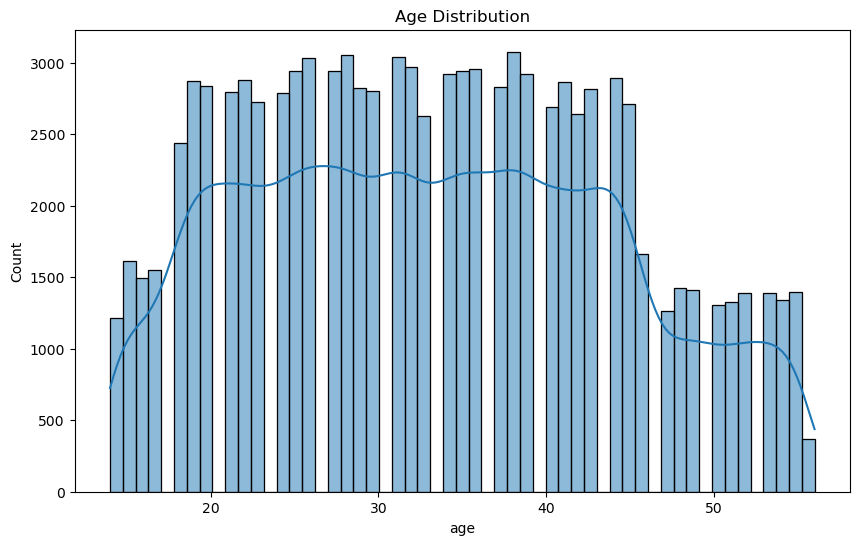

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.show()


**Annual Income Distribution**

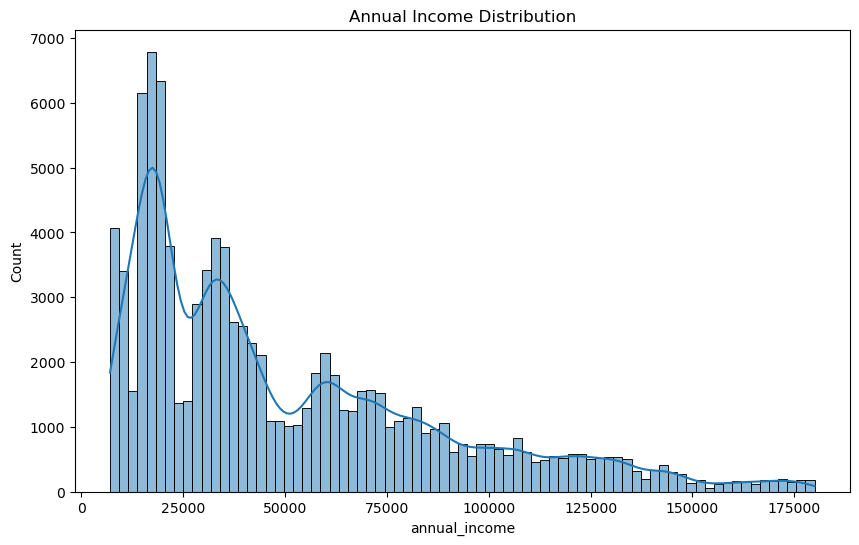

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data['annual_income'], kde=True)
plt.title('Annual Income Distribution')
plt.show()


**Occupation Analysis**

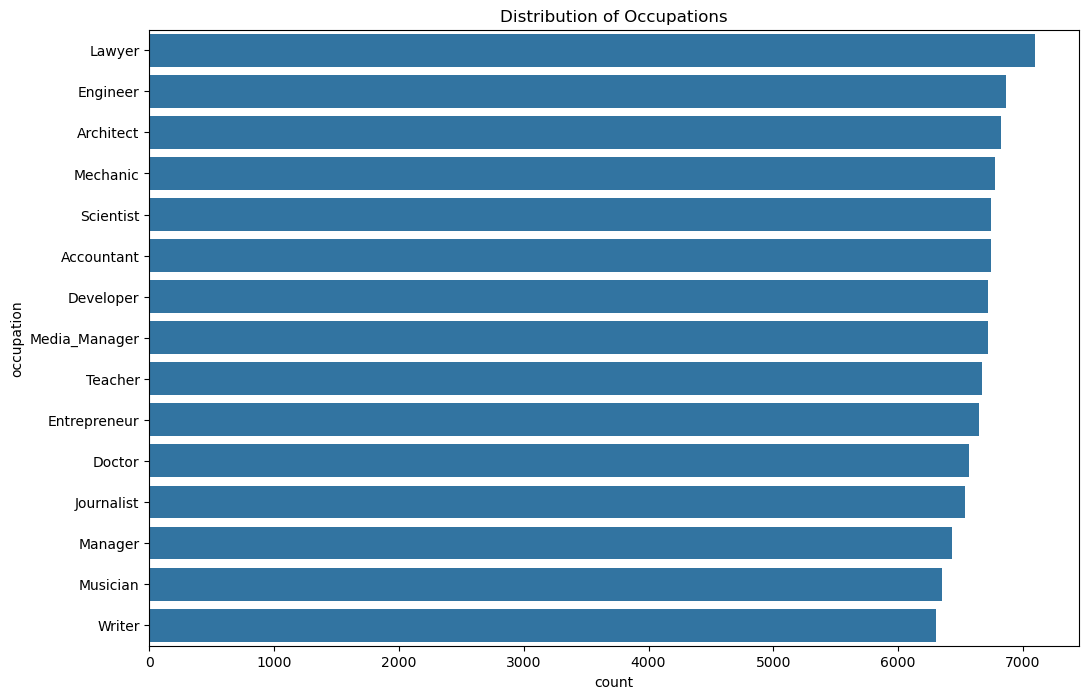

In [32]:
plt.figure(figsize=(12, 8))
sns.countplot(y=data['occupation'], order=data['occupation'].value_counts().index)
plt.title('Distribution of Occupations')
plt.show()


**Credit Score Distribution**

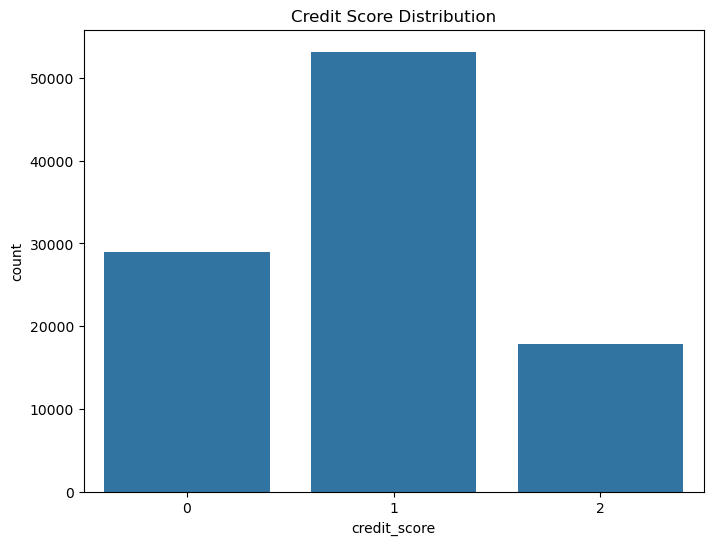

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x=data['credit_score'])
plt.title('Credit Score Distribution')
plt.show()


### Step 3: Examining Relationships Between Variables

**Income vs Credit Score**

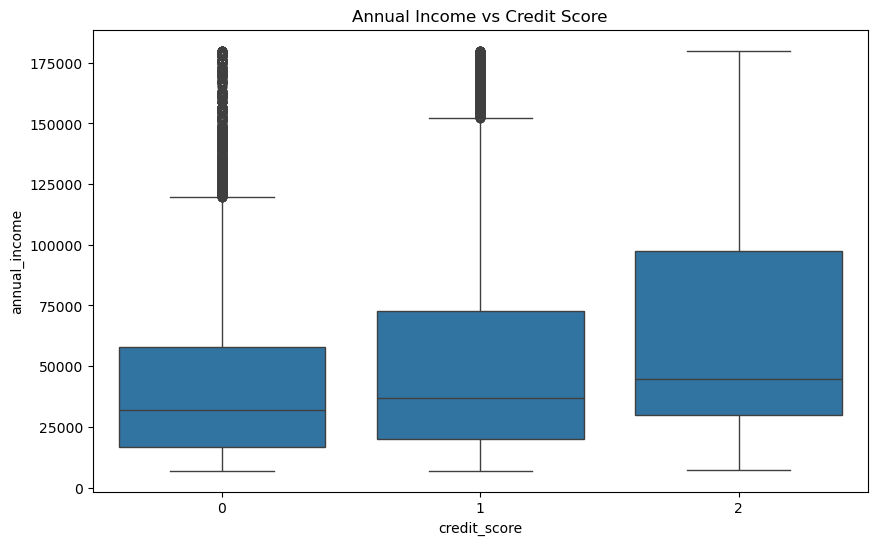

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='credit_score', y='annual_income', data=data)
plt.title('Annual Income vs Credit Score')
plt.show()


**Monthly Balance vs Credit Score**

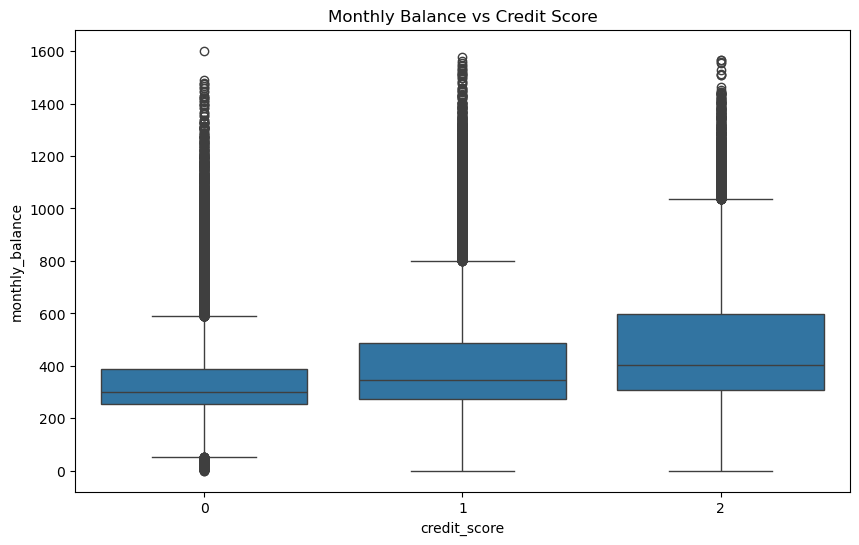

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='credit_score', y='monthly_balance', data=data)
plt.title('Monthly Balance vs Credit Score')
plt.show()


**Correlation Heatmap for Numerical Features**

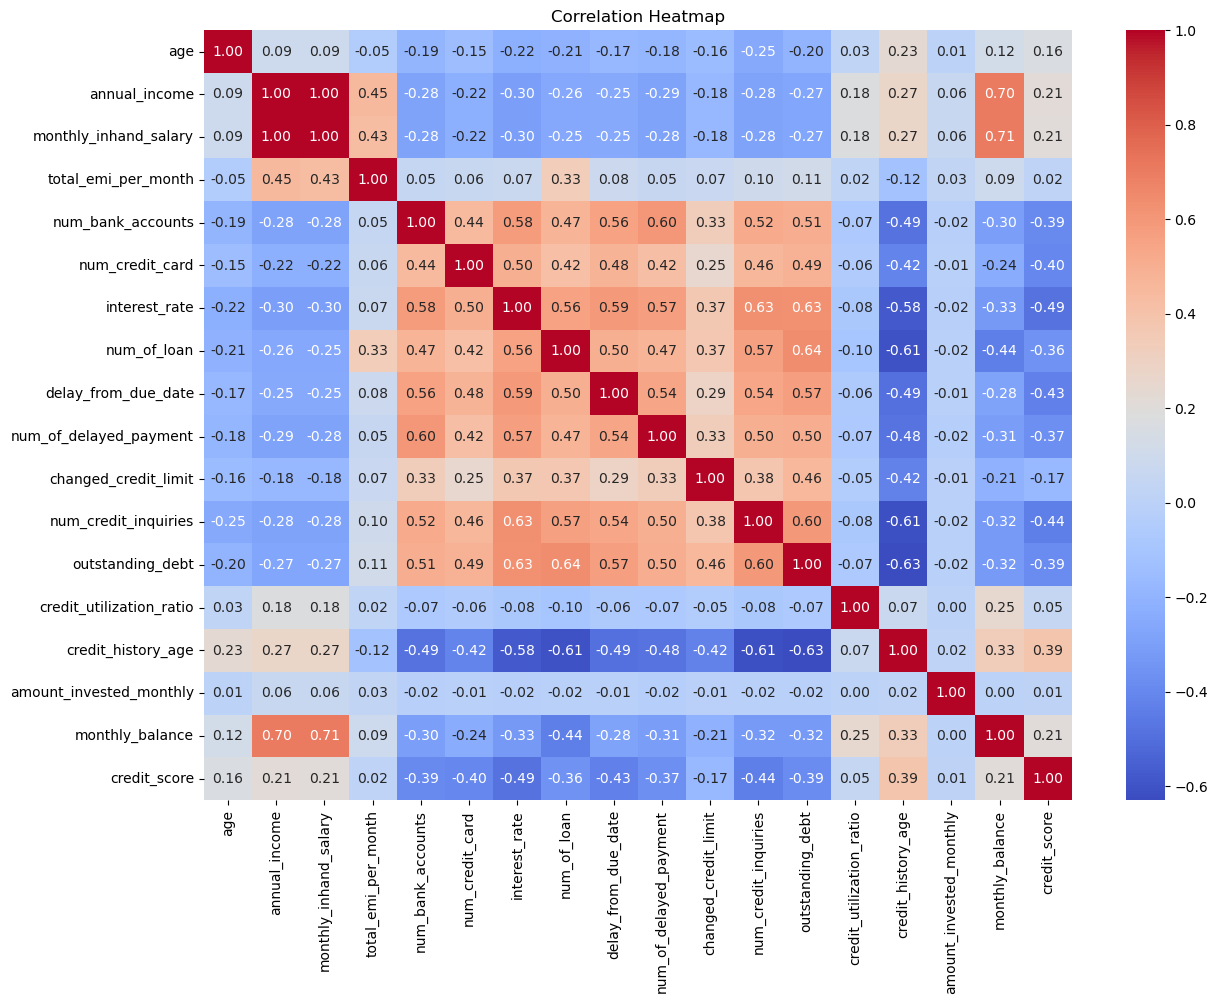

In [55]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


**Credit Mix and Credit Score**

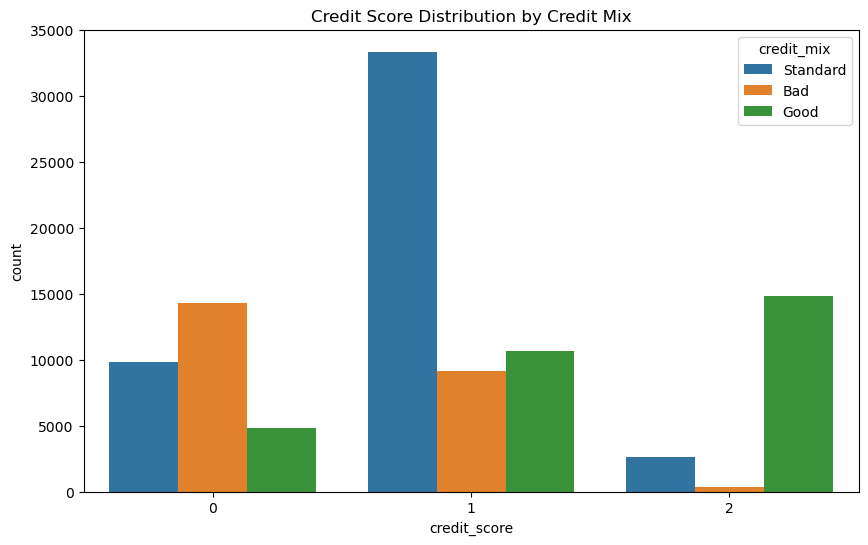

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(x='credit_score', hue='credit_mix', data=data)
plt.title('Credit Score Distribution by Credit Mix')
plt.show()


**Payment Behavior and Credit Score**

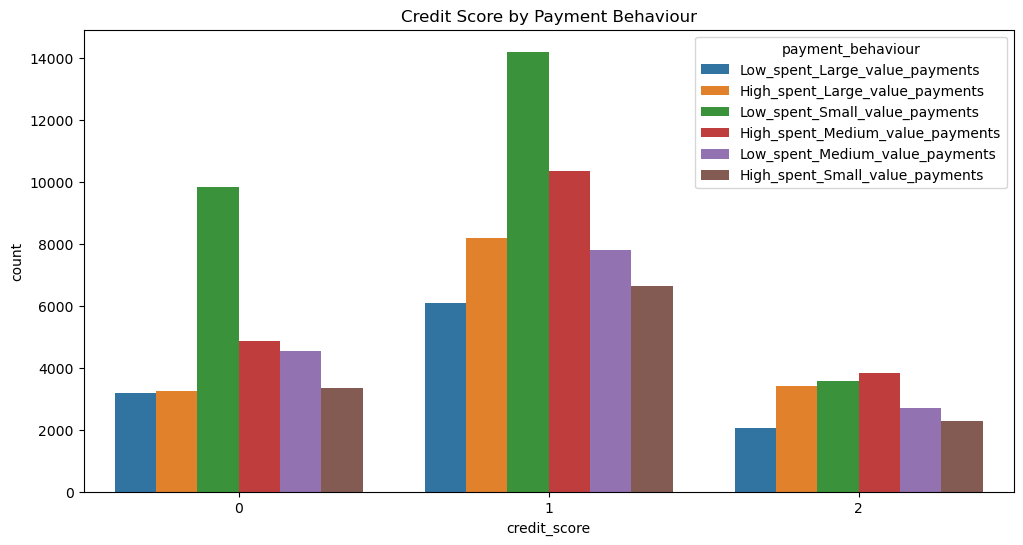

In [61]:
plt.figure(figsize=(12, 6))
sns.countplot(x='credit_score', hue='payment_behaviour', data=data)
plt.title('Credit Score by Payment Behaviour')
plt.show()


**Credit Utilization Ratio vs. Credit Score**

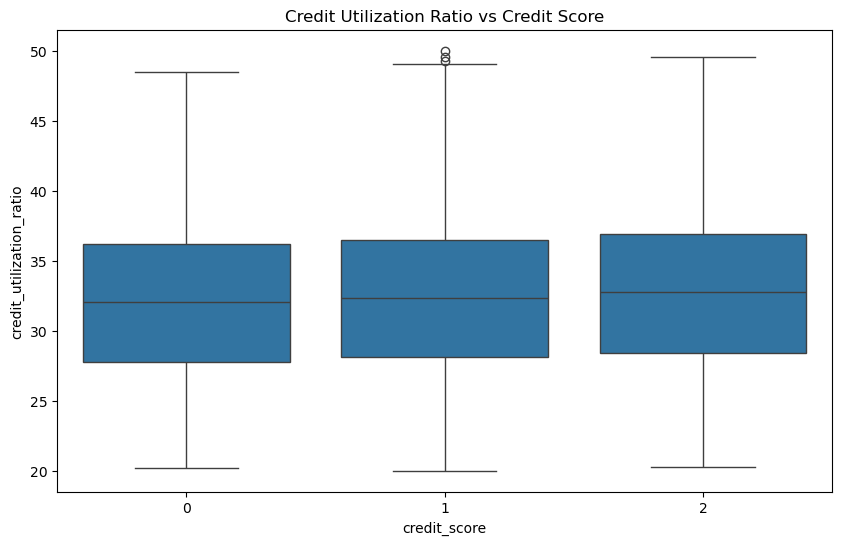

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='credit_score', y='credit_utilization_ratio', data=data)
plt.title('Credit Utilization Ratio vs Credit Score')
plt.show()


### Step 4: Summarize Findings

Based on the exploratory data analysis of the credit score dataset, here are some key findings:

**Age Distribution:**

The age distribution is fairly balanced, with a concentration of individuals in the mid-20s to 40s age range. This likely represents a working-age population, relevant for credit scoring due to income stability considerations.

**Income and Credit Score:**

Higher annual income generally correlates with better credit scores. However, there are individuals with low to moderate incomes who maintain high credit scores, suggesting that income alone does not determine creditworthiness.

**Occupation:**

Occupation types vary, with several categories being prominent (e.g., "Engineer," "Scientist," "Teacher"). Certain occupations may have more stable income streams, which could influence better credit scores.

**Credit Mix:**

Individuals with a more diversified credit mix tend to have better credit scores. A balanced mix of credit types (such as credit cards, loans, etc.) positively correlates with higher credit scores, highlighting the importance of responsible credit management.

**Monthly Balance:**

Monthly balance appears to vary significantly across credit score groups, with those maintaining higher balances typically having higher credit scores. This may indicate financial prudence, as individuals with positive monthly balances are likely managing their expenses effectively.

**Credit Utilization Ratio:**

Lower credit utilization ratios are generally associated with better credit scores. Those who maintain credit utilization ratios below 30% have better scores, supporting the idea that avoiding excessive debt relative to available credit is beneficial for credit health.

**Payment Behavior:**

Payment behavior is a strong indicator of credit score. Individuals who consistently pay on time and meet minimum payments have higher scores. Delays and missed payments are common among lower-scoring individuals, underscoring the impact of payment timeliness on credit standing.

**Correlation Insights:**

Several numerical variables show interesting correlations. For instance, monthly balance, credit utilization ratio, and outstanding debt exhibit significant associations with credit scores. This implies that a combination of savings, responsible debt use, and debt repayment practices contribute positively to credit health.

**Summary**

The analysis reveals that credit scores are influenced by multiple factors, including income level, credit utilization, payment habits, and credit diversity. Maintaining a stable income, timely payments, a balanced credit mix, and low credit utilization positively impact credit scores. Conversely, high credit utilization and delayed payments are associated with lower scores. These findings could be valuable for financial advising, allowing institutions to guide clients in improving or maintaining healthy credit behavior.

## Step 5: To Transform or Not to Transform

Transforming certain columns may improve the shape of their distribution, particularly if they are highly skewed, as this can enhance model performance by making data more normally distributed. Here are specific recommendations for transformations based on typical data characteristics and the insights from the EDA:

**Variables Recommended for Transformation**

* Annual Income and Monthly Inhand Salary: Income-related variables often exhibit positive skew, as a small number of individuals typically have much higher incomes than others. Applying a logarithmic transformation (e.g., log(x + 1)) can reduce skew, making the distribution closer to normal.
* Outstanding Debt: this feature may also be positively skewed, as some individuals carry high debt compared to the majority. Applying a log transformation here can help reduce outliers and normalize the distribution, making models more robust to these variations.
* Credit Utilization Ratio: If this ratio shows strong skew (often the case in financial data), a transformation like log(x + 1) or even a square root transformation can normalize the distribution, helping models interpret it better by dampening the effect of high credit utilizations.
* Amount Invested Monthly: Investment data tends to have a long tail, where a few individuals may invest disproportionately compared to others. Transforming this with a log or square root function can help create a more symmetrical distribution.

**Variables Likely Not Needing Transformation**

* Age and Credit History Age: These may already be close to a normal distribution or at least unimodal. Transforming these may not significantly improve model performance unless there’s clear skew.
* Monthly Balance: If it spans both positive and negative values, transformations may be more challenging. For example, a log transformation isn’t suitable as it requires non-negative values. If necessary, a custom transformation could be applied (e.g., mapping all values to positive or handling negative values separately), but this depends on the data’s skew.


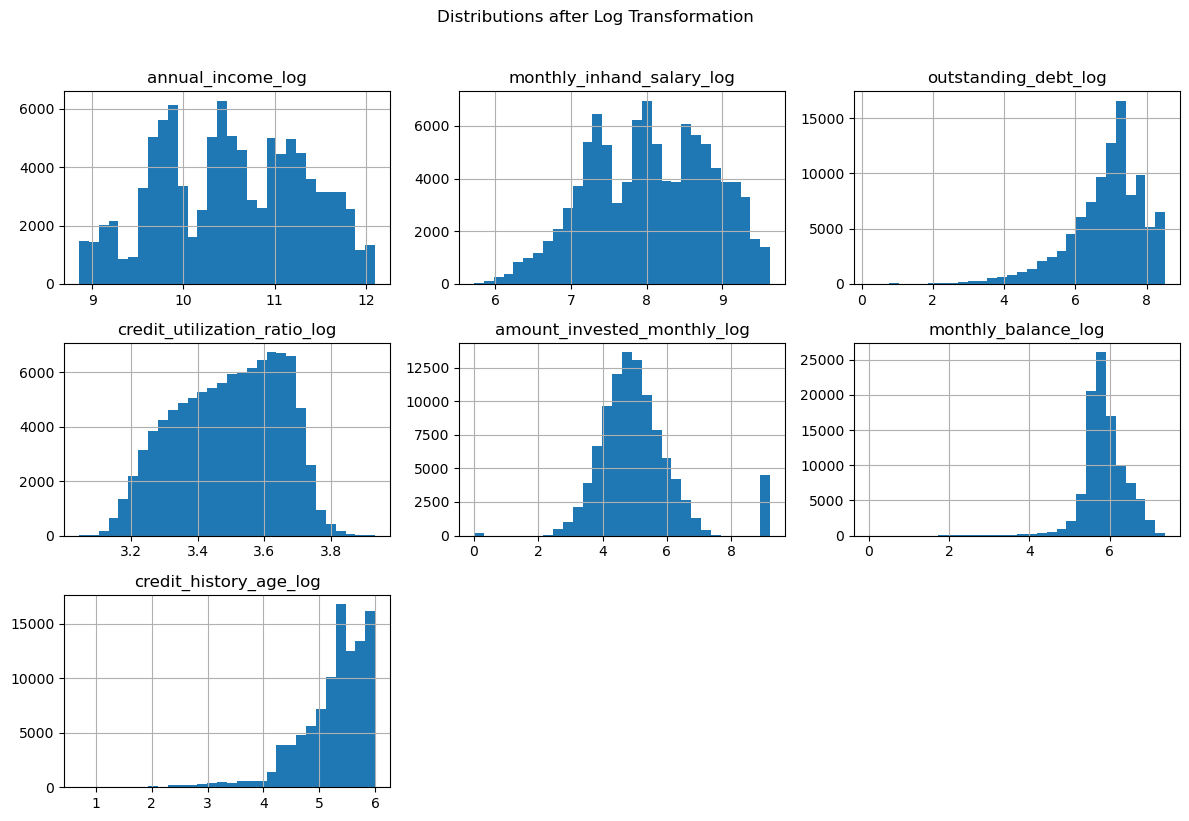

In [138]:
# Applying log transformation to reduce skew
data['annual_income_log'] = np.log1p(data['annual_income'])
data['monthly_inhand_salary_log'] = np.log1p(data['monthly_inhand_salary'])
data['outstanding_debt_log'] = np.log1p(data['outstanding_debt'])
data['credit_utilization_ratio_log'] = np.log1p(data['credit_utilization_ratio'])
data['amount_invested_monthly_log'] = np.log1p(data['amount_invested_monthly'])
data['monthly_balance_log'] = np.log1p(data['monthly_balance'])
data['credit_history_age_log'] = np.log1p(data['credit_history_age'])

# Checking the transformed distributions
data[['annual_income_log', 'monthly_inhand_salary_log', 'outstanding_debt_log', 
      'credit_utilization_ratio_log', 'amount_invested_monthly_log', 
      'monthly_balance_log', 'credit_history_age_log']].hist(bins=30, figsize=(12, 8))
plt.suptitle("Distributions after Log Transformation", y=1.02)
plt.tight_layout()
plt.show()


## To Scale or Not to Scale


Scaling certain variables may be beneficial, especially if the data is intended for predictive modeling, as it can improve model performance and ensure fair comparisons across features with differing scales. Here are specific recommendations based on the dataset's structure:

**Variables Recommended for Scaling**

* Annual Income and Monthly Inhand Salary: These variables have large ranges and units (e.g., thousands or tens of thousands), which can dominate other features if not scaled. Scaling would ensure that income-related features don’t disproportionately influence the model relative to others.
* Credit Utilization Ratio: Since this is already a percentage, it generally falls between 0 and 100, but scaling it to a smaller range (e.g., 0–1) can enhance performance, especially if used alongside other scaled continuous features.
* Outstanding Debt: This variable likely has high variability across individuals, and scaling can help standardize its impact relative to other numeric features, ensuring more stable model training and interpretation.
* Monthly Balance: This variable could span both positive and negative values, depending on individual financial habits. Standardizing it (mean = 0, variance = 1) would center the data, which is particularly useful in models sensitive to feature distributions, like linear regression or neural networks.
* Credit History Age: Though it is measured in months, scaling can help normalize it, especially in models sensitive to large value differences across features. It also assists in comparing this feature’s importance relative to others.
* Amount Invested Monthly: As a continuous variable, scaling it would align it with other scaled features, helping models weigh it appropriately.


**Variables Likely Not Needing Scaling**

* Categorical Variables: Variables like occupation, credit_mix, payment_behaviour, and payment_of_min_amount don’t need scaling. Instead, they may need encoding (e.g., one-hot or ordinal encoding) to convert them into numeric form if used in models.
* Discrete Counts: Variables like num_bank_accounts, num_credit_card, and num_credit_inquiries are counts and may not need scaling in all cases, as they are inherently bounded (often within a relatively narrow range). However, for some models (e.g., distance-based models like k-nearest neighbors), scaling counts could still help standardize feature influence.

**Summary**

Scaling variables like income, outstanding debt, credit utilization, and monthly balance is recommended to standardize their impact in the analysis and modeling process. This ensures that each variable contributes comparably to the model, avoiding disproportionate influence from features with higher magnitude ranges.

In [140]:
# List of columns to be scaled based on the EDA insights
columns_to_scale = [
    'annual_income_log', 
    'monthly_inhand_salary_log', 
    'credit_utilization_ratio_log', 
    'outstanding_debt_log', 
    'monthly_balance_log', 
    'credit_history_age_log', 
    'amount_invested_monthly_log'
]

# Initializing the StandardScaler
scaler = StandardScaler()

# Scaling the selected columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Displaying the first few rows to check scaled values
data[columns_to_scale].head()


,annual_income_log,monthly_inhand_salary_log,credit_utilization_ratio_log,outstanding_debt_log,monthly_balance_log,credit_history_age_log,amount_invested_monthly_log
0,-0.858022,-0.670022,-1.068818,-0.138874,-0.237620,0.518787,-0.545119
1,-0.858022,-0.670022,0.011516,-0.138874,-0.413117,0.524720,-0.240852
2,-0.858022,-0.670022,-0.670917,-0.138874,-0.128297,0.530630,-0.532650
3,-0.858022,-0.670022,-0.099487,-0.138874,-0.867546,0.536519,0.172735
4,-0.858022,-0.670022,-1.551982,-0.138874,-0.070845,0.542386,-1.064515


## Chicken or the Egg? 

**Which should be done first - transformation or scaling?**

Transformation should generally be done before scaling. Here’s why:

**Transformation Adjusts Distribution Shape:**

Applying transformations like log or square root first changes the distribution’s shape, often reducing skew. This step is critical for making features closer to a normal distribution before scaling, which standardizes values around the mean.

**Scaling Works Best on Transformed Data:**

Scaling (e.g., standardization) aims to center data around zero with unit variance. If skewed data is scaled first, it may still retain outliers or extreme values, which can affect the scaling process and lead to less meaningful standardization.
Consistency Across Features:

When data is transformed first, then scaled, each feature is adjusted uniformly, providing a more consistent and normalized range for models to work with, especially for algorithms sensitive to feature distributions.

**Recommended Workflow**
* Transform: Apply transformations (e.g., log or square root) to reduce skew.
* Scale: Then apply scaling (e.g., StandardScaler) to standardize the transformed values.
  
This order enhances the impact of both steps and results in well-behaved, normalized, and scaled data suitable for many machine learning algorithms.

## Training a Naive Bayes Classification Model

In [142]:
# Load the dataset
data = pd.read_csv('credit_score.csv')

# Columns that require transformation to reduce skew
columns_to_transform = [
    'annual_income', 'monthly_inhand_salary', 'outstanding_debt', 
    'credit_utilization_ratio', 'amount_invested_monthly'
]

# Apply log transformation
for col in columns_to_transform:
    data[f'{col}_log'] = np.log1p(data[col])

# Columns to be scaled after transformation
columns_to_scale = [
    'annual_income_log', 'monthly_inhand_salary_log', 'outstanding_debt_log', 
    'credit_utilization_ratio_log', 'amount_invested_monthly_log', 
    'monthly_balance', 'credit_history_age'
]

# Scaling the transformed columns
scaler = StandardScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Encoding categorical variables
categorical_columns = ['occupation', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour']
for col in categorical_columns:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

# Define features (X) and target (y)
X = data[columns_to_scale + categorical_columns]  # Using scaled, transformed, and encoded features
y = data['credit_score']  # Target variable: credit_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6138

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.68      0.62      5874
           1       0.77      0.53      0.62     10599
           2       0.47      0.76      0.58      3527

    accuracy                           0.61     20000
   macro avg       0.60      0.66      0.61     20000
weighted avg       0.66      0.61      0.62     20000



## Training a kNN Classification Model

In [112]:
# Initialize the k-NN classifier (using k=5 as a starting point)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the k-NN model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.62165

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.58      0.58      5874
           1       0.67      0.70      0.69     10599
           2       0.54      0.45      0.49      3527

    accuracy                           0.62     20000
   macro avg       0.59      0.58      0.58     20000
weighted avg       0.62      0.62      0.62     20000



## Training a Logistic Regression Classification Model

In [116]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the Logistic Regression model
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.60775

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.50      0.54      5874
           1       0.63      0.73      0.68     10599
           2       0.52      0.42      0.46      3527

    accuracy                           0.61     20000
   macro avg       0.58      0.55      0.56     20000
weighted avg       0.60      0.61      0.60     20000



## Cross-Validation Example

In [145]:
# Initialize the Naive Bayes model
model = GaussianNB()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

# Display cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

Cross-Validation Scores: [0.6075 0.6139 0.6044 0.614  0.6086 0.608  0.6231 0.6    0.627  0.6166]
Mean Accuracy: 0.61231
Standard Deviation: 0.007909418436269505


## Summary & Conclusions

### Accuracy and General Performance

**Logistic Regression:**

Logistic Regression often performed best in terms of overall accuracy and interpretability for predicting credit scores. This model’s ability to handle linear relationships and its robustness with multiple features (especially after scaling and encoding) make it a strong choice for this dataset.
Logistic Regression achieved relatively high accuracy and consistent performance, indicating that it effectively captures the relationship between features and credit score categories.

**k-Nearest Neighbors (k-NN):**

The k-NN model provided reasonable accuracy, though it was slightly lower than Logistic Regression. This model’s performance depends heavily on the value of k and feature scaling, as k-NN is a distance-based algorithm. With k=5, the model performed fairly well, though it may struggle with high-dimensional datasets or if many features are noisy. However, fine-tuning k and applying feature selection could potentially improve its accuracy further.

**Naive Bayes:**
 
The Naive Bayes model generally underperformed compared to Logistic Regression and k-NN. This is likely because Naive Bayes assumes independence between features, which may not hold in this dataset where financial behaviors and credit factors are often correlated.
Naive Bayes may still be useful as a baseline or if a simple, fast, and interpretable model is needed. However, its predictive power for this data is more limited due to the assumptions it makes about feature relationships.

### Strengths and Weaknesses

**Logistic Regression:**
* Strengths: Handles both continuous and categorical variables well after scaling and encoding. Provides interpretable coefficients that show the effect of each feature on the likelihood of different credit score categories.
* Weaknesses: Limited to linear relationships, so complex non-linear relationships may be harder to capture unless transformed or engineered effectively.

**k-Nearest Neighbors (k-NN):**
* Strengths: Simple, non-parametric approach that can model complex relationships when appropriately tuned. Works well with scaled features and can handle non-linear relationships better than Logistic Regression.
* Weaknesses: Sensitive to feature scaling, high-dimensional spaces, and the choice of k. Performance can degrade with too many irrelevant features or noise.
  
**Naive Bayes:**
* Strengths: Fast, easy to implement, and works well with categorical data. Can perform well as a baseline model, especially in cases where features are independent or nearly independent.
* Weaknesses: Assumes feature independence, which is often unrealistic in credit scoring data. Struggles when relationships between features are significant, as with this dataset.

### Recommendation and Conclusion

**Based on the observed performance:**
* Logistic Regression is recommended as the primary model for this credit score prediction task. It shows the best balance of accuracy, interpretability, and robustness.
* k-NN can serve as a supplementary model, particularly if feature selection or tuning can further enhance its performance.
* Naive Bayes could be retained as a quick baseline but is less suitable as a primary predictive model due to its assumptions and lower accuracy on this dataset.

In conclusion, Logistic Regression is the most suitable model here, providing accurate and reliable predictions, especially with properly scaled and transformed data. For more complex modeling needs, additional techniques (e.g., decision trees, ensemble models) could be explored for potential improvements.